<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDPHiperbolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

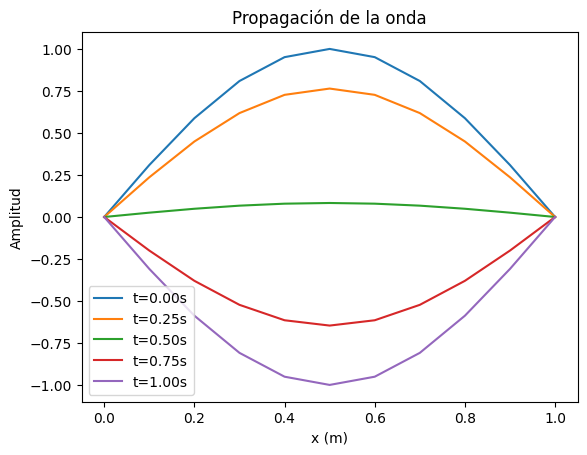

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 1.0        # Longitud de la cuerda
T = 1.0        # Tiempo de simulación
c = 1.0        # Velocidad de propagación
dx = 0.1       # Paso espacial
dt = 0.05      # Paso temporal

Nx = int(L / dx) + 1
Nt = int(T / dt) + 1
x = np.linspace(0, L, Nx)
u = np.zeros((Nt, Nx))

# Condiciones iniciales
u[0, :] = np.sin(np.pi * x)  # Perturbación inicial
u[:, 0] = 0                 # Extremo izquierdo fijo
u[:, -1] = 0                # Extremo derecho fijo
u[1, 1:-1] = u[0, 1:-1]     # Velocidad inicial cero

# Iteración explícita
r = (c * dt / dx)**2
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + r*(u[n, i+1] - 2*u[n, i] + u[n, i-1])

# Graficar el resultado
for n in range(0, Nt, 5):  # Muestra cada 5 pasos de tiempo
    plt.plot(x, u[n, :], label=f't={n*dt:.2f}s')

plt.title("Propagación de la onda")
plt.xlabel("x (m)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()
